In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import shuffle,resample
from sklearn.model_selection import cross_val_score

# Problem 1 Bias-Variance Trade-Off of LASSO

As is known to us, LASSO adds a tuning parameter (lambda) to the model, which impose a penalty on each term's coefficient based on its size. Because LASSO uses 1-norm as its penalty calculator, a large lambda can result in certain terms becoming zero by making their coefficients zero. This essentially removes those terms from the model such that the model complexity becomes less. Therefore, there is a conclusion that the LASSO model complexity becomes less as the lambda increases.

**(a)** Because the bias becomes large as the model complexity becomes less, it is obvious that the bias of LASSO increases as the lambda increases.

**(b)** Because the variance becomes small as the model complexity becomes less, it can be concluded that the variance of LASSO decreases as the lambda increases.

**(c)** Because the bias of LASSO increases as the lambda increases, the bias decreases as the lambda decreases. When the lambda decreases to zero, the bias also becomes zero. Moreover, when the lambda becomes zero, the LASSO model becomes a linear model which is unbiased.

**(d)** Because the variance of LASSO decreases as the lambda increases, the variance will become zero as the lambda becomes positive infinity. In this case, almost every term will be removed from the model, so the model will not have variance.

# Problem 2 Discriminant Analysis

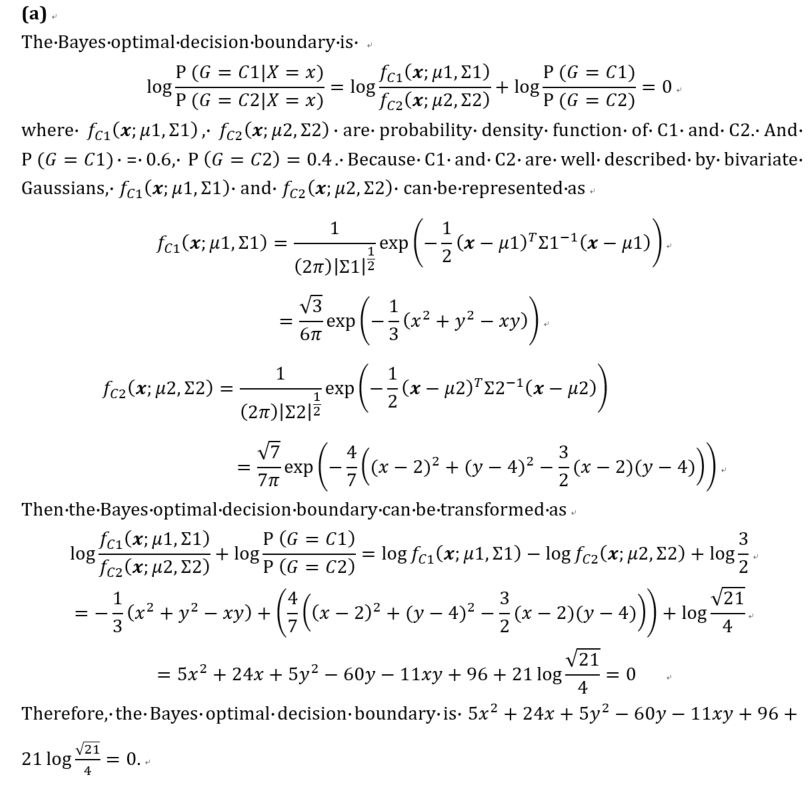

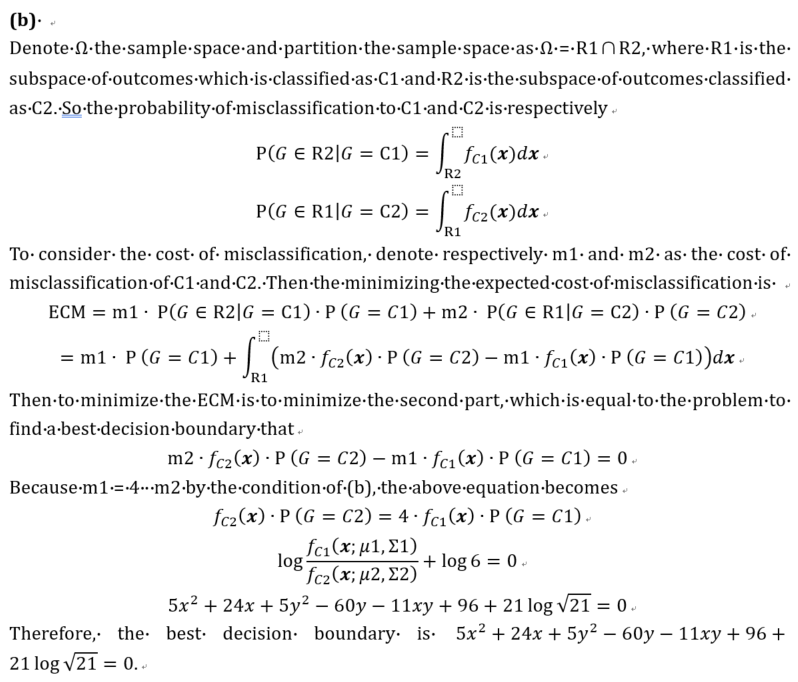

## (c)

<function matplotlib.pyplot.show>

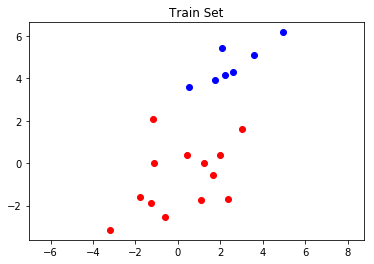

In [118]:
train_1 = np.random.multivariate_normal([0, 0], [[2,1],[1,2]], 13)
train_x1,train_y1 = train_1.T
train_2 = np.random.multivariate_normal([2, 4], [[2,1.5],[1.5,2]], 7)
train_x2,train_y2 = train_2.T
plt.plot(train_x1,train_y1,'ro')
plt.plot(train_x2,train_y2,'bo')
plt.axis('equal')
plt.title('Train Set')
plt.show

<function matplotlib.pyplot.show>

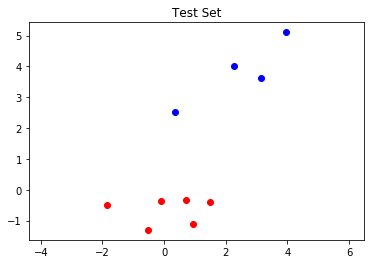

In [119]:
test_1 = np.random.multivariate_normal([0, 0], [[2,1],[1,2]], 6)
test_x1,test_y1 = test_1.T
test_2 = np.random.multivariate_normal([2, 4], [[2,1.5],[1.5,2]], 4)
test_x2,test_y2 = test_2.T
plt.plot(test_x1,test_y1,'ro')
plt.plot(test_x2,test_y2,'bo')
plt.axis('equal')
plt.title('Test Set')
plt.show

In [120]:
# decision function by the best decision boundary in (a) 
def decision(x,y):
    dec = 5*(x**2+y**2)+24*x-60*y-11*x*y+96+21*math.log(math.sqrt(21)/4.0)
    print dec
    if dec > 0:
        return 0
    else:
        return 1
    
test_true = [0,0,0,0,0,0,1,1,1,1] 
train_true = []
for i in range(13):
    train_true.append(0)
for i in range(7):
    train_true.append(1)
test_matrix_1 = np.matrix(test_1)
test_matrix_2 = np.matrix(test_2)
train_matrix_1 = np.matrix(train_1)
train_matrix_2 = np.matrix(train_2)

def error_rate(t_arr,p_arr):
    err_nums = 0.0
    for i in range(len(t_arr)):
        if t_arr[i] != p_arr[i]:
            err_nums+=1
    return err_nums/len(t_arr)

test_pre = []
for i in range(6):
    test_pre.append(decision(test_x1[i],test_y1[i]))
for i in range(4):
    test_pre.append(decision(test_x2[i],test_y2[i]))

bayes_err = error_rate(test_true,test_pre)
print '------'
print 'Bayes Error Rate\n',bayes_err

211.781668593
167.424896568
178.181618817
119.136340421
91.7571181388
140.804210488
-126.310806555
-20.9606187387
-82.008267368
-54.1463482333
------
Bayes Error Rate
0.0


## (d)

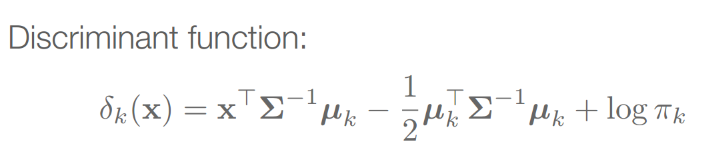

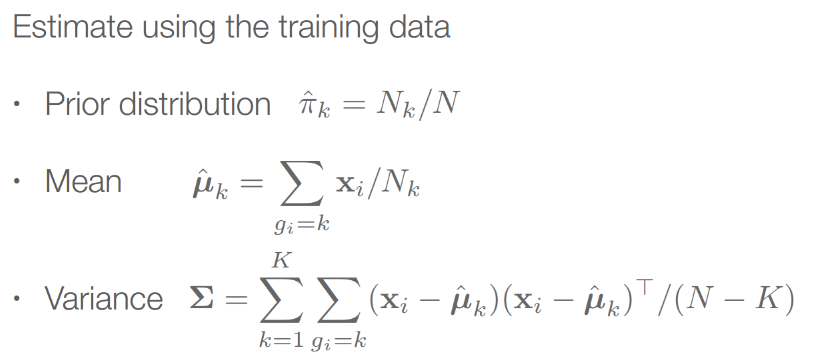

In [121]:
def sum_square_error(data, mean):
    total = []
    mean = np.matrix(mean)
    for item in data:
        item = np.matrix(item)
        matrix = ((item-mean).T*(item-mean))
        if len(total) == 0 :
            total = matrix
        else:
            total += matrix
    return total/(20-2)
pi_1 = 13/20.0
pi_2 = 7/20.0
mean_1 = [np.mean(train_x1),np.mean(train_y1)]
mean_2 = [np.mean(train_x2),np.mean(train_y2)]
matrix_mean_1 = np.matrix(mean_1)
matrix_mean_2 = np.matrix(mean_2)

lda_var = sum_square_error(train_1,mean_1) + sum_square_error(train_2,mean_2)
print 'prior of C1\t','prior of C2'
print pi_1,'\t\t',pi_2
print '\nC1 mean\t\t\t\t\t\t','C2 mean\t'
print mean_1,'\t',mean_2,'\t'
print '\nvariance\t'
print lda_var

def LDA_DF(samples,mean,var,p):
    results = []
    for x in samples:
        result = x*var.I*mean.T-0.5*mean*var.I*mean.T+np.log(p)
        result = result.tolist()[0][0]
        results.append(result)
    return results



test_pre = []

lda_1 = LDA_DF(test_matrix_1, matrix_mean_1, lda_var, pi_1)
lda_1 += (LDA_DF(test_matrix_2, matrix_mean_1, lda_var, pi_1))
lda_2 = LDA_DF(test_matrix_1, matrix_mean_2, lda_var, pi_2)
lda_2 += (LDA_DF(test_matrix_2, matrix_mean_2, lda_var, pi_2))

for i in range(10):
    if lda_1[i] > lda_2[i]:
        test_pre.append(0)
    else:
        test_pre.append(1)

LDA_err = error_rate(test_true,test_pre)
print '------'
print 'LDA Error Rate on test data\n',LDA_err

prior of C1	prior of C2
0.65 		0.35

C1 mean						C2 mean	
[0.19750166479571127, -0.66685904381217409] 	[2.53978936308377, 4.6736960364748015] 	

variance	
[[ 2.99702165  1.2158252 ]
 [ 1.2158252   1.95497509]]
------
LDA Error Rate on test data
0.0


## (e)

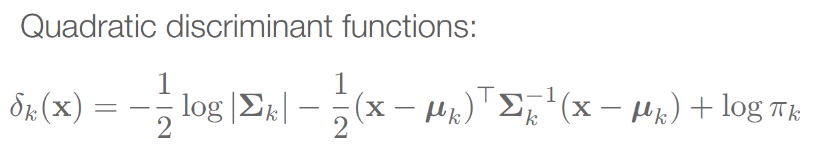

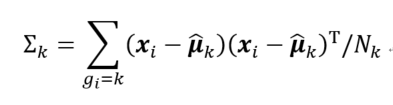

In [122]:
def calc_covar(data, mean):
    total = []
    mean = np.matrix(mean)
    for item in data:
        item = np.matrix(item)
        matrix = ((item-mean).T*(item-mean))
        if len(total) == 0 :
            total = matrix
        else:
            total += matrix
    return total/len(data)
covar_1 = calc_covar(train_1,mean_1)
covar_2 = calc_covar(train_2,mean_2)
print 'C1 mean\t\t\t\t\t\t','C2 mean\t'
print mean_1,'\t',mean_2,'\t'
print '\nC1 covariance'
print covar_1
print '\nC2 covariance'
print covar_2

def QDA_DF(samples,mean,var,p):
    results = []
    for x in samples:
        result = -0.5*np.log(np.linalg.det(var))-0.5*(x-mean)*var.I*(x-mean).T+np.log(p)
        result = result.tolist()[0][0]
        results.append(result)
    return results

test_pre = []

qda_1 = QDA_DF(test_matrix_1, matrix_mean_1, covar_1, pi_1)
qda_1 += (QDA_DF(test_matrix_2, matrix_mean_1, covar_1, pi_1))
qda_2 = QDA_DF(test_matrix_1, matrix_mean_2, covar_2, pi_2)
qda_2 += (QDA_DF(test_matrix_2, matrix_mean_2, covar_2, pi_2))

for i in range(10):
    if qda_1[i] > qda_2[i]:
        test_pre.append(0)
    else:
        test_pre.append(1)

QDA_err = error_rate(test_true,test_pre)
print '------'
print 'QDA Error Rate on test data\n',QDA_err

C1 mean						C2 mean	
[0.19750166479571127, -0.66685904381217409] 	[2.53978936308377, 4.6736960364748015] 	

C1 covariance
[[ 3.22272306  1.17138343]
 [ 1.17138343  2.31200968]]

C2 covariance
[[ 1.72156998  0.95098129]
 [ 0.95098129  0.73334652]]
------
QDA Error Rate on test data
0.1


## (f)

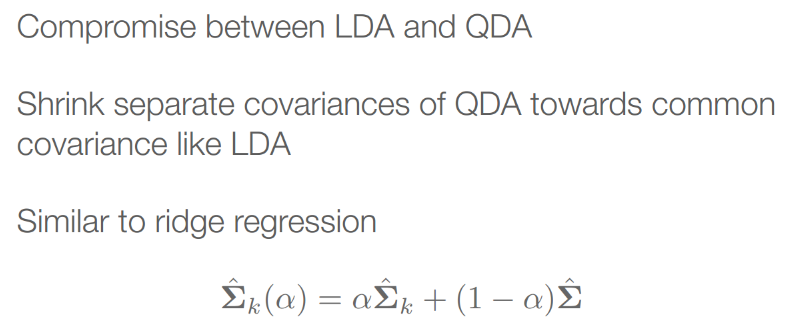

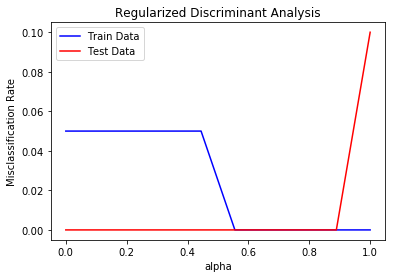

In [123]:
alphas = np.linspace(0,1,10)

train_errs = []
test_errs = []
for alpha in alphas:
    test_pre = []
    train_pre = []
    
    rvar_1 = alpha*covar_1 + (1-alpha)*lda_var
    rvar_2 = alpha*covar_2 + (1-alpha)*lda_var
    
    test_rda_1 = QDA_DF(test_matrix_1, matrix_mean_1, rvar_1, pi_1)
    test_rda_1 += (QDA_DF(test_matrix_2, matrix_mean_1, rvar_1, pi_1))
    test_rda_2 = QDA_DF(test_matrix_1, matrix_mean_2, rvar_2, pi_2)
    test_rda_2 += (QDA_DF(test_matrix_2, matrix_mean_2, rvar_2, pi_2))
    
    train_rda_1 = QDA_DF(train_matrix_1, matrix_mean_1, rvar_1, pi_1)
    train_rda_1 += (QDA_DF(train_matrix_2, matrix_mean_1, rvar_1, pi_1))
    train_rda_2 = QDA_DF(train_matrix_1, matrix_mean_2, rvar_2, pi_2)
    train_rda_2 += (QDA_DF(train_matrix_2, matrix_mean_2, rvar_2, pi_2))

    for i in range(len(test_true)):
        if test_rda_1[i] > test_rda_2[i]:
            test_pre.append(0)
        else:
            test_pre.append(1)
            
    for i in range(len(train_true)):
        if train_rda_1[i] > train_rda_2[i]:
            train_pre.append(0)
        else:
            train_pre.append(1)
    
    test_errs.append(error_rate(test_true,test_pre))
    train_errs.append(error_rate(train_true,train_pre))
    
ax = plt.gca()
ax.plot(alphas,train_errs, color = 'b', label = 'Train Data')
ax.plot(alphas,test_errs, color = 'r', label = 'Test Data')
plt.xlabel('alpha')
plt.ylabel('Misclassification Rate')
plt.title('Regularized Discriminant Analysis')
plt.legend(loc='best')
plt.show()

#### Conclusion
As is shown on this graph, the misclaffication rate will first decrease as the alpha increases. And then it will increase greatly as the alpha grows to 0.9. So the model performs well as the alpha is between 0.6 and 0.8. So there is a good tradeoff between LDA and QDA here.

# Problem 3

In [181]:
train_data = pd.read_csv('blogData_train.csv', header=None)
train_X = train_data.as_matrix(range(280))
train_Y = np.ravel(train_data.as_matrix([280]))
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
def calc_beta_bias(beta_hat,beta): 
    sum_abs = 0.0
    for i in range(len(beta)):
        sum_abs += np.abs(beta_hat[i]-beta[i])
    return sum_abs

## (a)

In [243]:
x,y = train_X.shape
train_index = range(x)
b = int(x**0.7)
s = 100
r = 100
bias_arr = []
var_arr = []
lm = linear_model.SGDRegressor(penalty='none',n_iter = 5,eta0=10**(-8))
for j in range(s):
    X_train,y_train = shuffle(train_X,train_Y)
    X_train = X_train[:b]
    y_train = y_train[:b]
    coef_arr = []
    for k in range(r):
        weights = np.random.multinomial(x,[1./b]*b)
        lm.fit(X_train, y_train, sample_weight = weights)
        coef_arr.append(lm.coef_)
    bias = np.zeros(280)
    var = np.zeros(280)
    coef_mean = np.mean(coef_arr,axis=0)
    for item in coef_arr:
        bias += item - coef_mean
        var += np.square(item - coef_mean)
    bias /= r
    var = np.sqrt(var / r)
    bias_arr.append(bias)
    var_arr.append(var)
final_bias = np.mean(bias_arr,axis=0)
final_var = np.mean(var_arr,axis=0)
table_a = pd.DataFrame(data=[final_bias,final_var],index=['bias','var'])
table_a

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
bias,2.219579e-19,-7.294512e-20,5.989982e-20,1.150122e-19,9.389191e-20,3.913970e-20,1.884560e-19,2.743777e-20,-1.344844e-19,-3.371869e-20,...,4.679688e-21,6.952277e-21,1.426234e-21,1.775330e-20,-1.115271e-20,-1.016440e-23,4.713230e-21,0.0,-1.874060e-21,-1.859915e-21
var,3.441436e-04,2.760150e-04,1.134142e-04,2.104015e-04,3.701680e-04,3.591491e-04,2.887845e-04,6.289545e-05,1.906496e-04,4.026121e-04,...,6.427178e-05,6.080120e-05,5.601632e-05,6.851672e-05,5.713836e-05,5.636483e-05,1.337724e-05,0.0,1.365319e-05,1.304676e-05


## (b)

### When using SGDRegressor, due to the sensity of train data, beta will hardly converge if initial learning rate is big. However, the default value of "eta0" in SGDRegressor is 0.01. So this is why "eta0" is set to 10^(-8).

#### (i) This case uses pseudoinverse to compute the "true" estimate.

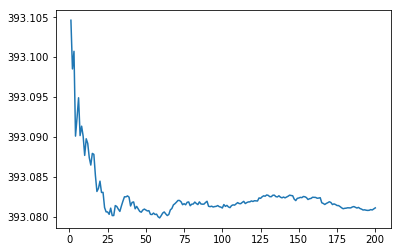

In [186]:
x,y = train_X.shape
lm = linear_model.SGDRegressor(penalty='none',n_iter = 5,eta0=10**(-8))
'''lm.fit(train_X,train_Y)
beta_hat = lm.coef_'''
mat_x = np.matrix(train_X)
mat_y = np.matrix(train_Y)
pseudo = np.linalg.pinv(mat_x.T*mat_x)
beta_hat = pseudo*mat_x.T*mat_y.T
#top_arr = []

b = int(x**0.7)
r = 100
s = 200
err_arr = []

coef_array = []
scores = []
for j in range(s):
    X_train,y_train = shuffle(train_X,train_Y)
    X_train = X_train[:b]
    y_train = y_train[:b]
    temp_error_arr = []
    for k in range(r):
        weights = np.random.multinomial(x,[1./b]*b) 
        #X_train,y_train = resample(X_train,y_train,n_samples=x)
        lm.fit(X_train, y_train, sample_weight = weights)
        coef_array.append(np.ravel(lm.coef_))
        #top_arr.append(calc_beta_bias(beta_hat[top_index_hat],c[top_index_hat]))
        temp_error_arr.append(calc_beta_bias(np.ravel(beta_hat),np.ravel(lm.coef_)))
    err_arr.append(np.mean(temp_error_arr))
    scores.append(np.mean(err_arr))
plt.plot(range(1,s+1),scores)
plt.show()

#### (ii) This case uses SGD to compute the "true" estimate.

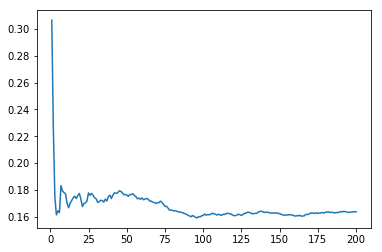

In [232]:
x,y = train_X.shape
lm = linear_model.SGDRegressor(penalty='none',n_iter = 5,eta0=10**(-8))
lm.fit(train_X,train_Y)
beta_hat = lm.coef_
mat_x = np.matrix(train_X)
mat_y = np.matrix(train_Y)
pseudo = np.linalg.pinv(mat_x.T*mat_x)
#beta_hat = pseudo*mat_x.T*mat_y.T

b = int(x**0.7)
r = 100
s = 200
err_arr = []

coef_array = []
scores = []
for j in range(s):
    X_train,y_train = shuffle(train_X,train_Y)
    X_train = X_train[:b]
    y_train = y_train[:b]
    temp_error_arr = []
    for k in range(r):
        weights = np.random.multinomial(x,[1./b]*b) 
        lm.fit(X_train, y_train, sample_weight = weights)
        coef_array.append(np.ravel(lm.coef_))
        temp_error_arr.append(calc_beta_bias(np.ravel(beta_hat),np.ravel(lm.coef_)))
    err_arr.append(np.mean(temp_error_arr))
    scores.append(np.mean(err_arr))
plt.plot(range(1,s+1),scores)
plt.show()

## (c)

### From (b), we know that the estimated coefficients have converged where s > 200. From pages 47-49 on the book "Elements of Statistical Learning", we know that "true estimates" made some assumptions on the distribution of your coefficients and the confidence interval of "true estimates" can be calculated by formula(3.14).

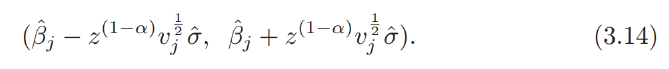

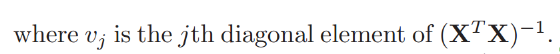

and

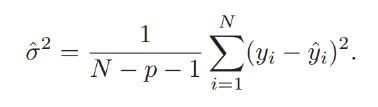

#### (i) This case uses pseudoinverse to compute the "true" estimate.

In [221]:
top_index_hat = np.ravel(np.argsort(np.ravel(beta_hat))[:5])
mat_coef = np.matrix(coef_array)
mat_coef = mat_coef.T[top_index_hat]

print 'top 5 coefficients confidence interval comparison'
for j in range(len(top_index_hat)):
    z = 1.645 # z**0.95 = 1.645
    diag_j = pseudo.item((top_index_hat[j],top_index_hat[j]))
    e_var = np.sqrt((np.sum(np.square(train_Y-np.ravel(mat_x*beta_hat))))/(x-y-1))
    true_ci_up = beta_hat[top_index_hat[j]].item() + z*np.sqrt(diag_j)*e_var 
    true_ci_low = beta_hat[top_index_hat[j]].item() - z*np.sqrt(diag_j)*e_var
    mean_beta = np.mean(np.ravel(mat_coef[j]))
    var_beta = np.sqrt(np.var(np.ravel(mat_coef[j])))
    e_ci_up = mean_beta + z*var_beta
    e_ci_low = mean_beta - z*var_beta
    
    '''
    mean_beta = np.mean(np.ravel(mat_coef[j]))
    var_beta = np.sqrt(np.var(np.ravel(mat_coef[j])))
    e_ci_up = mean_beta + z*var_beta
    e_ci_low = mean_beta - z*var_beta
    '''
    
    print 'the ' + str(top_index_hat[j]) + 'th coefficient'
    print 'true estimates:\t'+ '(' + str(true_ci_low) + ',\t' + str(true_ci_up) + ')'
    print 'BLB estimates:\t'+ '(' + str(e_ci_low) + ',\t' + str(e_ci_up) + ')'

top 5 coefficients confidence interval comparison
the 0th coefficient
true estimates:	(-85.3321544724,	-25.0578733479)
BLB estimates:	(0.0038318437468,	0.00899984422215)
the 6th coefficient
true estimates:	(-61.1122543473,	-6.56566887392)
BLB estimates:	(0.00346116964688,	0.00796232935093)
the 13th coefficient
true estimates:	(-34.8537244812,	-5.60619512924)
BLB estimates:	(0.00279192467636,	0.00570169021574)
the 16th coefficient
true estimates:	(-26.4947611455,	-2.55928577588)
BLB estimates:	(0.00312566871766,	0.00700052570066)
the 36th coefficient
true estimates:	(-27.0726127154,	7.49464606148)
BLB estimates:	(0.00223348455864,	0.00531247887943)


#### (ii) This case uses SGD to compute the "true" estimate.

In [240]:
top_index_hat = np.ravel(np.argsort(np.ravel(beta_hat))[:5])
mat_coef = np.matrix(coef_array)
mat_coef = mat_coef.T[top_index_hat]

print 'top 5 coefficients confidence interval comparison'
for j in range(len(top_index_hat)):
    z = 1.645 # z**0.95 = 1.645
    diag_j = pseudo.item((top_index_hat[j],top_index_hat[j]))
    e_var = np.sqrt((np.sum(np.square(train_Y-np.ravel(mat_x*np.matrix(beta_hat).T))))/(x-y-1))
    true_ci_up = beta_hat[top_index_hat[j]].item() + z*np.sqrt(diag_j)*e_var 
    true_ci_low = beta_hat[top_index_hat[j]].item() - z*np.sqrt(diag_j)*e_var
    mean_beta = np.mean(np.ravel(mat_coef[j]))
    var_beta = np.sqrt(np.var(np.ravel(mat_coef[j])))
    e_ci_up = mean_beta + z*var_beta
    e_ci_low = mean_beta - z*var_beta
    
    '''
    mean_beta = np.mean(np.ravel(mat_coef[j]))
    var_beta = np.sqrt(np.var(np.ravel(mat_coef[j])))
    e_ci_up = mean_beta + z*var_beta
    e_ci_low = mean_beta - z*var_beta
    '''
    print '-----------'
    print 'the ' + str(top_index_hat[j]) + 'th coefficient'
    print 'true estimates:\t'+ '(' + str(true_ci_low) + ',\t' + str(true_ci_up) + ')'
    print 'BLB estimates:\t'+ '(' + str(e_ci_low) + ',\t' + str(e_ci_up) + ')'

top 5 coefficients confidence interval comparison
-----------
the 22th coefficient
true estimates:	(-2.99269452599,	2.98943529474)
BLB estimates:	(-0.00486054818792,	-0.00243108698776)
-----------
the 47th coefficient
true estimates:	(-4.98930382537,	4.98662190305)
BLB estimates:	(-0.00432457599907,	-0.00158978151448)
-----------
the 60th coefficient
true estimates:	(-0.301085931345,	0.299307193601)
BLB estimates:	(-0.00265956395117,	-0.00133520586161)
-----------
the 266th coefficient
true estimates:	(-0.269951125519,	0.269839930608)
BLB estimates:	(-0.000561809368534,	0.000341831010499)
-----------
the 267th coefficient
true estimates:	(-0.276912435218,	0.276808906363)
BLB estimates:	(-0.000684027474245,	0.000390166780601)


# Problem 4

In [244]:

'''
    load data from txt file
'''
def load_data(filename):
    f = open(filename, 'r')
    k = 0
    data = f.read()
    f.close()
    data_list = data.split('\n')
    arr_list = []
    for line in data_list:
        if line != '' :
            arr = line.split(' ')
            feature = []
            for item in arr:
                feature.append(int(item))
            arr_list.append(feature)
    return arr_list
'''
    transform original data to samples dataset
'''
def samples_dict(features, labels, length_p):
    samples = np.zeros((len(labels),length_p))
    for item in features:
        samples[item[0]-1][item[1]-1] = item[2]
    return samples 

In [245]:
def model_assess_cv(X_train,y_train, alpha1, alpha2, str_assess, in_kf):
    std_model = linear_model.LogisticRegression(C=10000000000000000000000000000000000000)
    lasso_model = linear_model.LogisticRegression(penalty='l1', C = alpha2)
    ridge_model = linear_model.LogisticRegression(C = alpha1)

    temp_std = cross_val_score(std_model, X_train, y_train, scoring=str_assess, cv=in_kf)  
    temp_ridge = cross_val_score(ridge_model, X_train, y_train, scoring=str_assess, cv=in_kf)
    temp_lasso = cross_val_score(lasso_model, X_train, y_train, scoring=str_assess, cv=in_kf)
    
    return temp_std.mean(),temp_ridge.mean(),temp_lasso.mean()

In [246]:
def model_compare(X_train,y_train,alphas):
    kf = model_selection.KFold(n_splits=5)
    out_kf = model_selection.KFold(n_splits=5)

    accuracy_scores = np.zeros((len(alphas),3))
    roc_auc_scores = np.zeros((len(alphas),3))
    for j in range(len(alphas)):        
        accuracy_scores[j] = model_assess_cv(X_train,y_train,alphas[j], alphas[j], 'accuracy', kf)

    ridge_min_alpha_acc = alphas[np.argmax(accuracy_scores[:,1])]
    lasso_min_alpha_acc = alphas[np.argmax(accuracy_scores[:,2])]

    acc_score = model_assess_cv(X_train,y_train,ridge_min_alpha_acc, lasso_min_alpha_acc, 'accuracy', out_kf)
    auc_score = model_assess_cv(X_train,y_train,ridge_min_alpha_acc, lasso_min_alpha_acc, 'roc_auc', out_kf)

    acc_arr = [1-acc_score[0],1-acc_score[1],1-acc_score[2]]
    auc_arr = [auc_score[0],auc_score[1],auc_score[2]]
    arr = [acc_arr,auc_arr]
    table = pd.DataFrame(data = arr, index=['classification error', 'AUC'], columns=['Standard(lambda=0.0)','Ridge(lambda='+str(1.0/ridge_min_alpha_acc)+')','Lasso(lambda='+str(1.0/lasso_min_alpha_acc)+')'])
    return table

In [247]:
test_features = load_data('test-features.txt')
test_labels = np.ravel(load_data('test-labels.txt'))
train_features = load_data('train-features.txt')
train_labels = np.ravel(load_data('train-labels.txt'))
train_samples = samples_dict(train_features,train_labels,2500)
test_samples = samples_dict(test_features,test_labels,2500)


## (a)

In [79]:
#standardizing train data
train_X = preprocessing.scale(train_samples)
test_X = preprocessing.scale(test_samples)
X_train_a,y_train_a = shuffle(train_X,train_labels)
alphas = np.logspace(-5,5,50)
table_a = model_compare(X_train_a,y_train_a,alphas)
print 'train data CV'
table_a.head()

train data CV


,Standard(lambda=0.0),Ridge(lambda=3727.59372031),Lasso(lambda=0.0184206996933)
classification error,0.011429,0.008571,0.008571
AUC,0.999467,0.999631,0.998522


## (b)

In [77]:
sum_terms = train_samples.sum(axis=1)
train_X_b = train_samples
for i in range(len(sum_terms)):
    train_X_b[i] /= float(sum_terms[i])
X_train_b,y_train_b = shuffle(train_X_b,train_labels)
alphas = np.logspace(-5,5,50)
table_b = model_compare(X_train_b,y_train_b,alphas)
print 'train data CV'
table_b.head()

train data CV


,Standard(lambda=0.0),Ridge(lambda=0.000104811313415),Lasso(lambda=0.000268269579528)
classification error,0.010000,0.008571,0.005714
AUC,0.999625,0.999544,0.998810


## (c)

In [248]:
train_X_c = np.log(train_X_b+0.1)
X_train_c,y_train_c = shuffle(train_X_c,train_labels)
alphas = np.logspace(-5,5,50)
table_c = model_compare(X_train_c,y_train_c,alphas)
print 'train data CV'
table_c.head()

train data CV


,Standard(lambda=0.0),Ridge(lambda=2.5595479227e-05),Lasso(lambda=0.000686648845004)
classification error,0.005714,0.005714,0.007143
AUC,0.999671,0.999671,0.999589


## (d)

**1.** Comparing three normalization, the first method is worse than the second method. I think this is because the data can be presented better by frequency of words than by general uncorrelated standardizing columns with normal Gaussian distribution. In addition, the third method is much better than other methods because it adds a smoothing and prevents the underflow by using log(x+0.1). And in the third model, the difference of error rates between three models are very small and even the error rates are sometimes equal. I think a good regularization of train data maybe provide benefits to obtain a good model.

**2.** Comparing three models with the same normalization methods, we see that the performance of standard model is a little worse than other models. In my opinion, this is because other models can give some penalty to the terms such that they have good performance in classification error(CR). CR are slightly differences between Ridge and Lasso: sometimes the CR of Ridge will be slightly better than that of Lasso while it is sometimes worse according to the difference cases of shuffling train data. However, the AUC of Ridge is always slightly better than the AUC of Lasso.

**3.** Comparing the regularization parameter, the values of optimal lambdas in ridge and lasso in case (a) are bigger than other cases. I think this means that the models in (b) and (c) do not need larger lambda to regularize the terms.